In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit 
import nltk
import tensorflow
import torch
import scipy

In [2]:
#!pip3 install torch torchvision torchaudio

In [3]:
#!pip install seaborn

In [4]:
df_drug = pd.read_csv(r"D:\projects dataset\PubChem\PubChem_compound_list_5qFAzbRO0fLm2NPBUbma7KYaxHr4Z5BN6miLAfF5mQDxYKU.csv",low_memory=False)
df_drug.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,0.4,14,0,...,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Acetylcarnitine,Biomolecular Interactions and Pathways|Classif...,8,NaN,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,-0.3,14,1,...,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,NaN,Biological Test Results|Chemical and Physical ...,8,781325|1272365|1671498,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,2.3,13,0,...,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Dinitrochlorobenzene,Biological Test Results|Biomolecular Interacti...,13,155|157|161|165|167|175|179|192|220|300|302|11...,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,1.5,4,0,...,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",NaN,Agrochemical Information|Biological Test Resul...,15,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,-0.1,4,1,...,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Ethylene Chlorohydrin,Biological Test Results|Biomolecular Interacti...,13,256|1188|384212|651631|651632|651633|651634|72...,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,NaN


In [5]:
df_drug.isnull().sum()

cid                 0
cmpdname           20
cmpdsynonym        20
mw                  0
mf                  0
polararea           0
complexity          0
xlogp            6206
heavycnt            0
hbonddonor          0
hbondacc            0
rotbonds            0
inchi               0
isosmiles           0
inchikey            0
iupacname         246
meshheadings    13124
annothits           0
annothitcnt         0
aids             8226
cidcdate            0
sidsrcname          0
depcatg             0
annotation      17350
dtype: int64

In [6]:
#df[["cmpdname","cmpdsynonym","xlogp","iupacname","meshheadings","aids","annotation"]].isnull().sum()/len(df[["cmpdname","cmpdsynonym","xlogp","iupacname","meshheadings","aids","annotation"]])

In [7]:
print("Missing data percentage: \n")
df_drug[["cmpdname","cmpdsynonym","xlogp","iupacname","meshheadings","aids","annotation"]].isnull().sum()/len(df_drug["cmpdname"]) * 100

Missing data percentage: 



cmpdname         0.110681
cmpdsynonym      0.110681
xlogp           34.344217
iupacname        1.361372
meshheadings    72.628666
aids            45.522966
annotation      96.015495
dtype: float64

(array([1.453e+04, 2.396e+03, 6.100e+02, 1.720e+02, 7.000e+01, 3.000e+01,
        3.200e+01, 4.400e+01, 4.100e+01, 2.200e+01, 2.200e+01, 1.500e+01,
        2.700e+01, 1.200e+01, 1.600e+01, 2.300e+01, 5.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([   0. ,  202.5,  405. ,  607.5,  810. , 1012.5, 1215. , 1417.5,
        1620. , 1822.5, 2025. , 2227.5, 2430. , 2632.5, 2835. , 3037.5,
        3240. , 3442.5, 3645. , 3847.5, 4050. ]),
 <BarContainer object of 20 artists>)

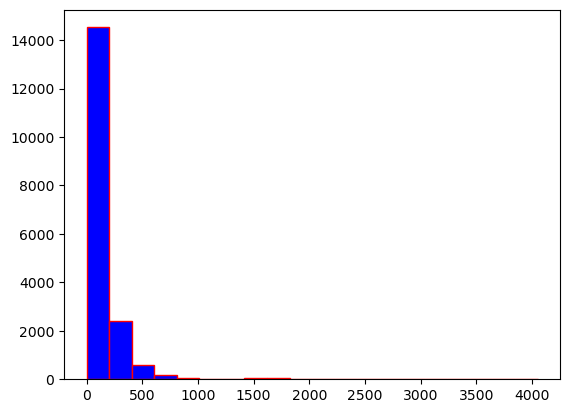

In [8]:
plt.hist(df_drug['polararea'],color='blue',bins=20,edgecolor='red')

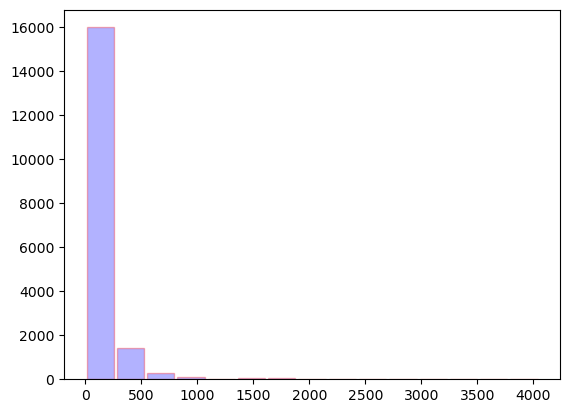

In [9]:
#plotting histogram 
plt.hist(df_drug['polararea'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
#plt.xlabel('Base price range') 
#plt.ylabel('Distinct order') 

#plot title 
#plt.title('Inspecting price effect') 
plt.rcParams["figure.figsize"] = (8,8)
#save and display the plot 
#plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_10.png',dpi=300,bbox_inches='tight') 
plt.show();

In [10]:
df_drug.columns

Index(['cid', 'cmpdname', 'cmpdsynonym', 'mw', 'mf', 'polararea', 'complexity',
       'xlogp', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds', 'inchi',
       'isosmiles', 'inchikey', 'iupacname', 'meshheadings', 'annothits',
       'annothitcnt', 'aids', 'cidcdate', 'sidsrcname', 'depcatg',
       'annotation'],
      dtype='object')

In [11]:
#Select only numberic columns
#result = df_drug.select_dtypes(include='number')
#print(result)
# need to print heatmap, piechart, 

In [12]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18070 entries, 0 to 18069
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cid           18070 non-null  int64  
 1   cmpdname      18050 non-null  object 
 2   cmpdsynonym   18050 non-null  object 
 3   mw            18070 non-null  float64
 4   mf            18070 non-null  object 
 5   polararea     18070 non-null  float64
 6   complexity    18070 non-null  float64
 7   xlogp         11864 non-null  float64
 8   heavycnt      18070 non-null  int64  
 9   hbonddonor    18070 non-null  int64  
 10  hbondacc      18070 non-null  int64  
 11  rotbonds      18070 non-null  int64  
 12  inchi         18070 non-null  object 
 13  isosmiles     18070 non-null  object 
 14  inchikey      18070 non-null  object 
 15  iupacname     17824 non-null  object 
 16  meshheadings  4946 non-null   object 
 17  annothits     18070 non-null  object 
 18  annothitcnt   18070 non-nu

In [13]:
#df_struct = pd.read_csv(r)

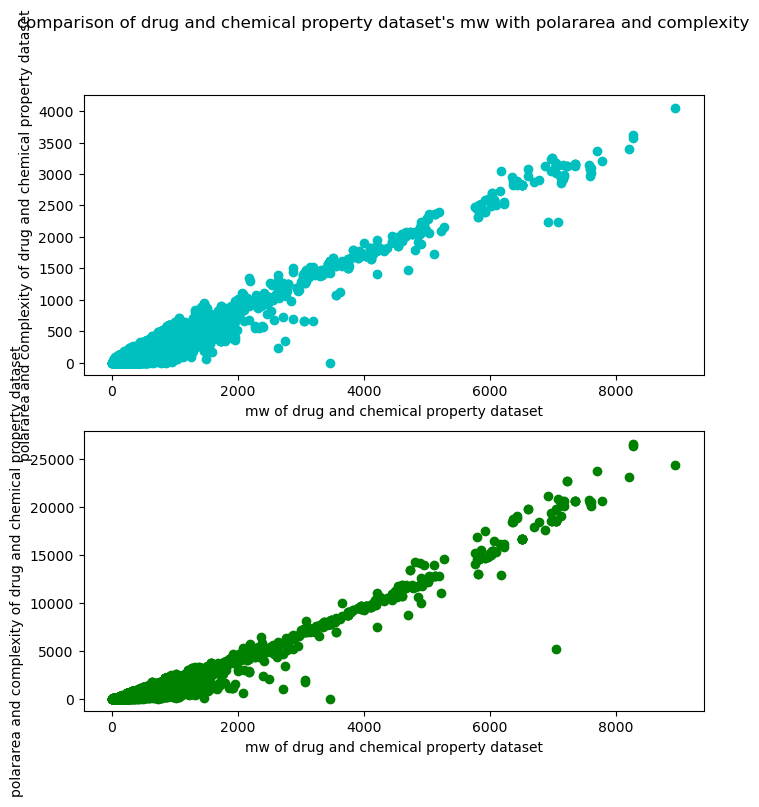

In [14]:
fig, axs = plt.subplots(2)
axs[0].scatter(df_drug['mw'],df_drug['polararea'],color='c')
axs[1].scatter(df_drug['mw'],df_drug['complexity'],color='g')
fig.suptitle("comparison of drug and chemical property dataset's mw with polararea and complexity")
#plt.xlabel("mw of drug and chemical property dataset")
#plt.ylabel("polararea of drug and chemical property dataset")
plt.rcParams["figure.figsize"] = (8,15)
for ax in axs.flat:
    ax.set(xlabel="mw of drug and chemical property dataset",ylabel="polararea and complexity of drug and chemical property dataset")
plt.show()

In [15]:
df_new_drug = df_drug.drop(['cmpdname','cmpdsynonym','mf','inchi','isosmiles','inchikey','iupacname','meshheadings','annothits','aids','sidsrcname','depcatg','annotation'],axis=1)
df_new_drug.head()

,cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,annothitcnt,cidcdate
0,1,203.24,66.4,214.0,0.4,14,0,4,5,8,20050623
1,2,204.24,63.6,219.0,-0.3,14,1,4,6,8,20050623
2,6,202.55,91.6,224.0,2.3,13,0,4,0,13,20050326
3,11,98.96,0.0,6.0,1.5,4,0,0,1,15,20040916
4,34,80.51,20.2,10.0,-0.1,4,1,1,1,13,20050326


In [16]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18070 entries, 0 to 18069
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cid           18070 non-null  int64  
 1   cmpdname      18050 non-null  object 
 2   cmpdsynonym   18050 non-null  object 
 3   mw            18070 non-null  float64
 4   mf            18070 non-null  object 
 5   polararea     18070 non-null  float64
 6   complexity    18070 non-null  float64
 7   xlogp         11864 non-null  float64
 8   heavycnt      18070 non-null  int64  
 9   hbonddonor    18070 non-null  int64  
 10  hbondacc      18070 non-null  int64  
 11  rotbonds      18070 non-null  int64  
 12  inchi         18070 non-null  object 
 13  isosmiles     18070 non-null  object 
 14  inchikey      18070 non-null  object 
 15  iupacname     17824 non-null  object 
 16  meshheadings  4946 non-null   object 
 17  annothits     18070 non-null  object 
 18  annothitcnt   18070 non-nu

plt.figure(figsize=(10, 8))
plt.subplot(2,3,1)
plt.plot(['mw','polararea'])
plt.subplot(2,3,2)
plt.plot(['mw','cid'])
plt.subplot(2,3,3,)
plt.scatter(df_drug['mw'],df_drug['polararea'],c='red')
plt.show()

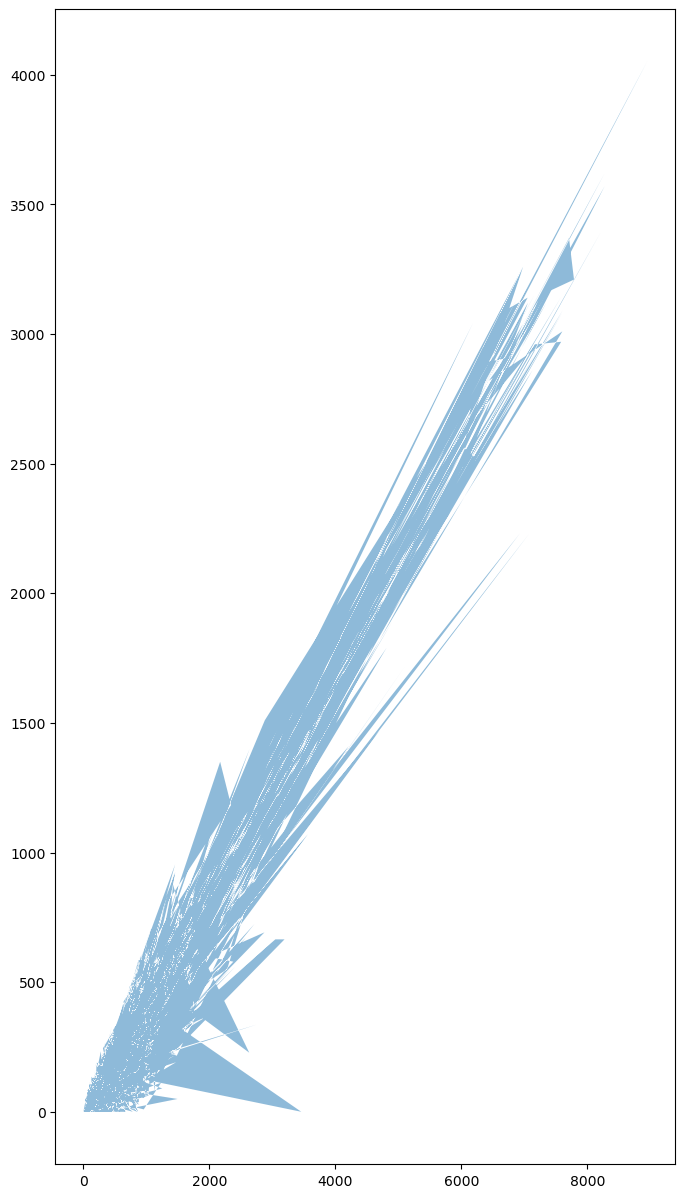

In [17]:
plt.fill_between(df_new_drug['mw'],df_new_drug['polararea'],alpha=0.5, linewidth=0)
plt.show()

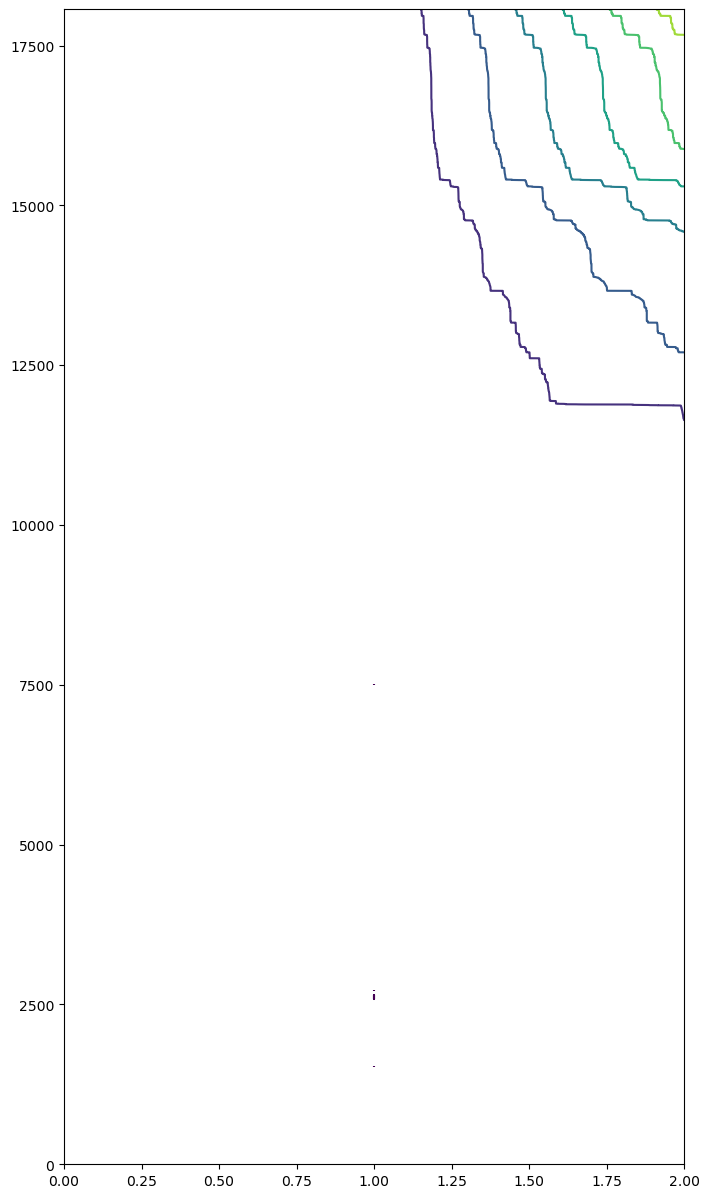

In [18]:
plt.contour(df_new_drug[['mw','polararea','cid']])
plt.show()

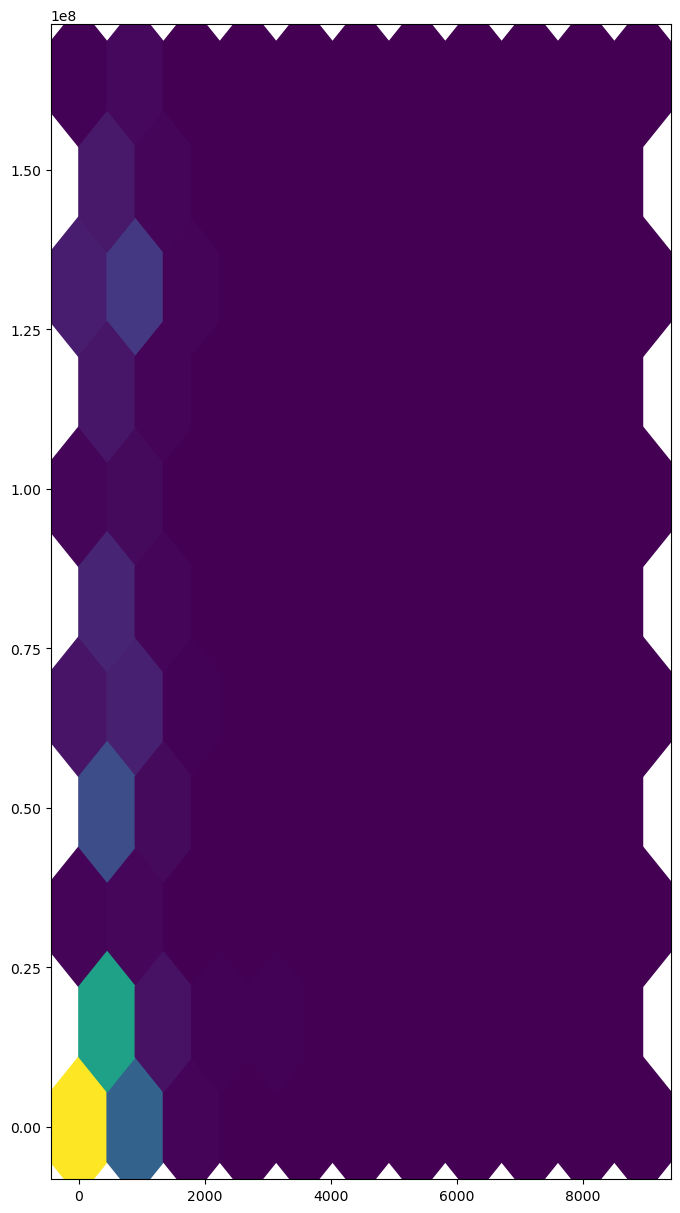

In [19]:
plt.hexbin(df_new_drug['mw'],df_new_drug['cid'],gridsize=10)
#plt.set(xlim=(-2,2), ylim=(-3,3))
plt.show()

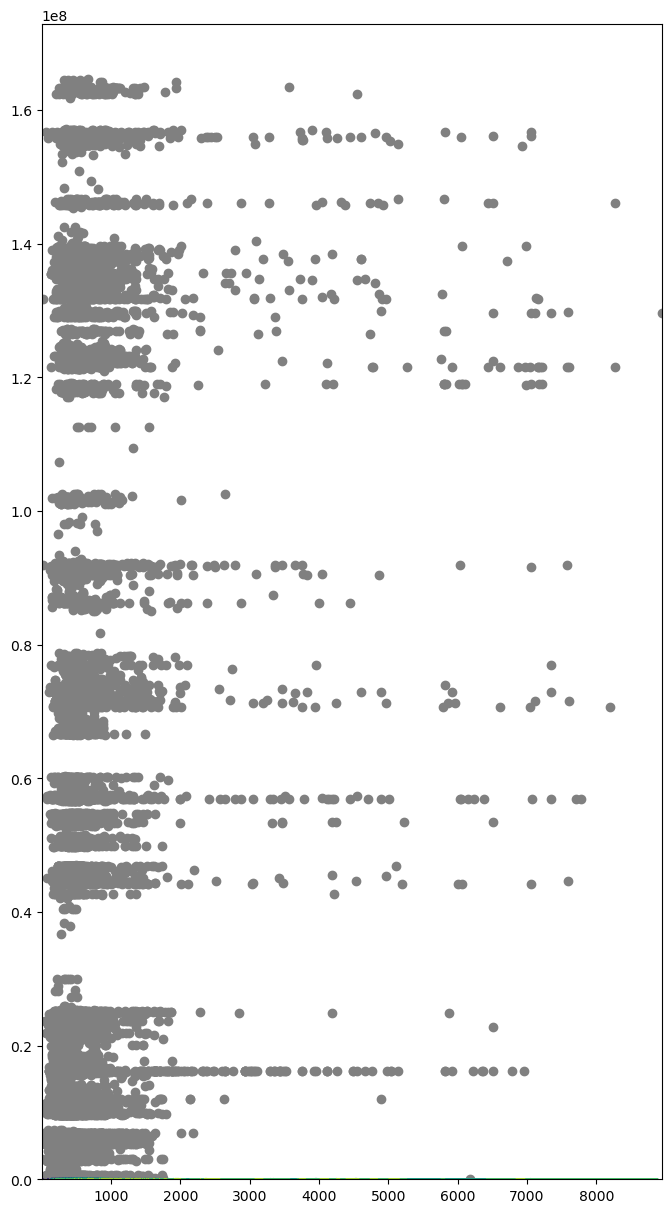

In [20]:
plt.plot(df_new_drug['mw'],df_new_drug['cid'],'o',color='grey')
plt.tricontour(df_new_drug['mw'],df_new_drug['polararea'],df_new_drug['cid'])
plt.show()

In [21]:
#plt.triplot(df_new_drug['mw'],df_new_drug['cid'])
#plt.set(xlim=(-3,3),ylim=(-3,3))
#plt.show()

In [22]:
#sns.relplot(data=df_new_drug, x ="mw", col="cid",hue="mw",style="cid",size="cid")

In [23]:
# sns.set(style="whitegrid")
# drug_data = sns.load_dataset('df_new_drug')
# ax = sns.stripplot(x='mw',y='cid',data=drug_data)
# plt.title('Graph')
# plt.show()

In [24]:
#import torch as pt

In [25]:
#dataset = pt.read(r"D:\projects dataset\PubChem\PubChem_compound_list_5qFAzbRO0fLm2NPBUbma7KYaxHr4Z5BN6miLAfF5mQDxYKU.csv",low_memory=False)

<AxesSubplot:>

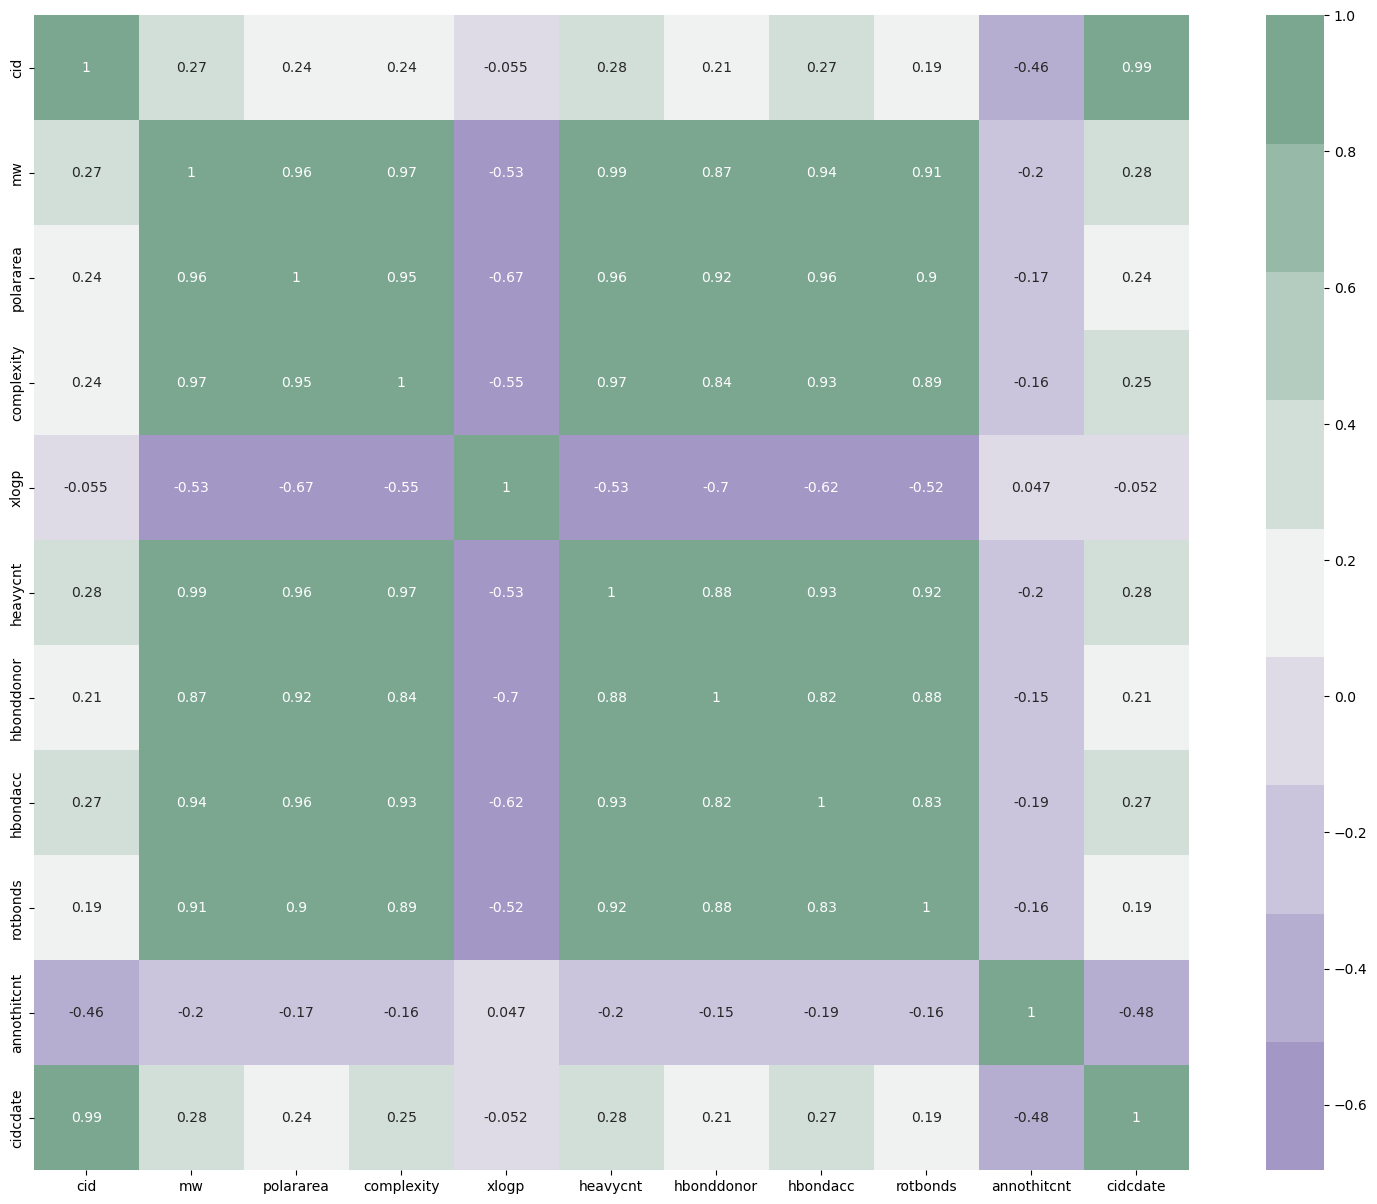

In [26]:
cmap = sns.diverging_palette(275,150,s=40,l=65,n=9)
corrma = df_drug.corr()
plt.rcParams["figure.figsize"] = (20,15)
plt.plot()
sns.heatmap(corrma, cmap=cmap, annot=True, square= True)

In [27]:
df_drug.groupby("depcatg").count()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,isosmiles,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,annotation
depcatg,,,,,,,,,,,,,,,,,,,,,
Chemical Vendors,1017,1015,1015,1017,1017,1017,1017,572,1017,1017,...,1017,1017,986,247,1017,1017,0,1017,1017,10
Chemical Vendors|Curation Efforts,18,18,18,18,18,18,18,17,18,18,...,18,18,18,8,18,18,0,18,18,0
Chemical Vendors|Curation Efforts|Governmental Organizations,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,0,1,1,0
Chemical Vendors|Curation Efforts|Governmental Organizations|Journal Publishers,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,1,1,0,1,1,0
Chemical Vendors|Curation Efforts|Governmental Organizations|Journal Publishers|Legacy Depositors|NIH Initiatives|Research and Development,10,10,10,10,10,10,10,8,10,10,...,10,10,9,1,10,10,9,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NIH Initiatives,13,13,13,13,13,13,13,12,13,13,...,13,13,13,7,13,13,6,13,13,0
NIH Initiatives|Research and Development,6,6,6,6,6,6,6,4,6,6,...,6,6,5,1,6,6,1,6,6,0
NIH Initiatives|Subscription Services,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,0,1,1,0


In [28]:
#df_drug2 = df_drug.select_dtypes(include='object').head()
#df_drug2

In [29]:
df_drug_object_columns = list(df_drug.select_dtypes(include=['object']).columns)
df_drug_object_columns

['cmpdname',
 'cmpdsynonym',
 'mf',
 'inchi',
 'isosmiles',
 'inchikey',
 'iupacname',
 'meshheadings',
 'annothits',
 'aids',
 'sidsrcname',
 'depcatg',
 'annotation']

In [30]:
df_drug_number_columns = list(df_drug.select_dtypes(include=['int','float']).columns)
df_drug_number_columns

['cid',
 'mw',
 'polararea',
 'complexity',
 'xlogp',
 'heavycnt',
 'hbonddonor',
 'hbondacc',
 'rotbonds',
 'annothitcnt',
 'cidcdate']

In [31]:
df_drug["iupacname"].isnull().sum()

246

In [32]:
df_drug["cmpdsynonym"].isnull().sum()

20

In [33]:
df_drug["cmpdname"].isnull().sum()

20

In [34]:
df1 = df_drug.dropna(subset=["cmpdname","cmpdsynonym","iupacname"],axis=0)

In [35]:
#df1["cmpdname"].isnull().sum()

In [36]:
#df1["cmpdsynonym"].isnull().sum()

In [37]:
#df1["iupacname"].isnull().sum()

In [38]:
len(df_drug['cmpdname'])

18070

In [39]:
len(df1['cmpdname'])

17785

In [40]:
df1.isnull().sum()

cid                 0
cmpdname            0
cmpdsynonym         0
mw                  0
mf                  0
polararea           0
complexity          0
xlogp            5975
heavycnt            0
hbonddonor          0
hbondacc            0
rotbonds            0
inchi               0
isosmiles           0
inchikey            0
iupacname           0
meshheadings    12909
annothits           0
annothitcnt         0
aids             7977
cidcdate            0
sidsrcname          0
depcatg             0
annotation      17076
dtype: int64

<AxesSubplot:>

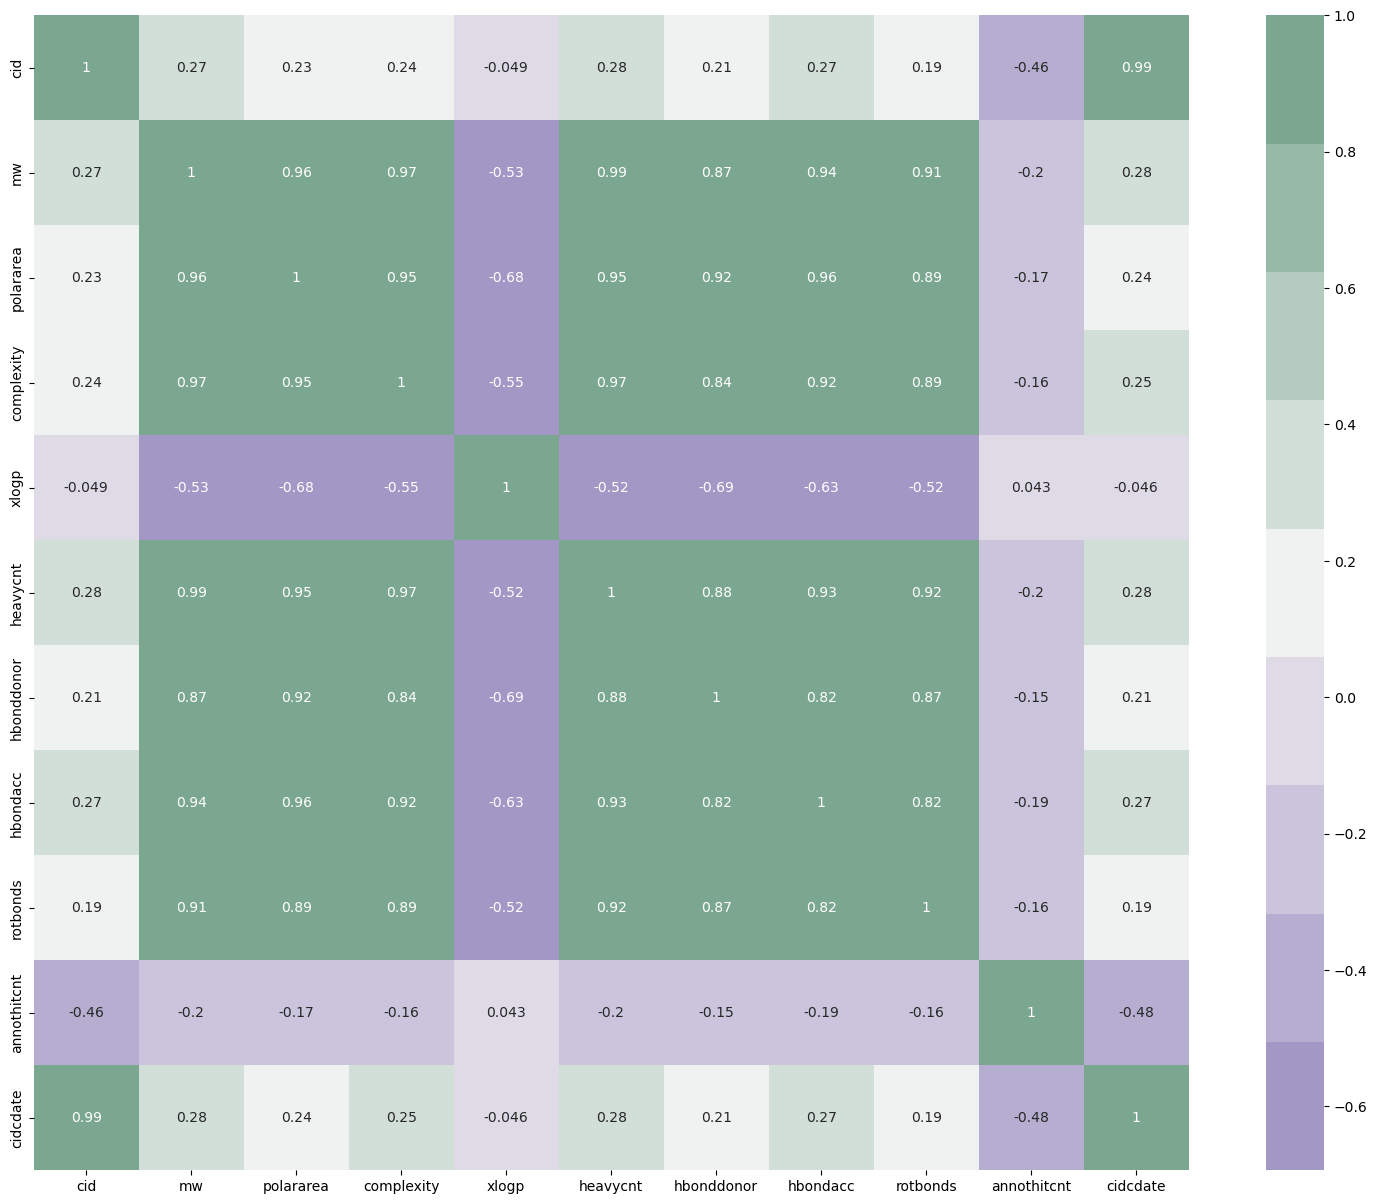

In [41]:
cmap = sns.diverging_palette(275,150,s=40,l=65,n=9)
corrma = df1.corr()
plt.rcParams["figure.figsize"] = (20,15)
plt.plot()
sns.heatmap(corrma, cmap=cmap, annot=True, square= True)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17785 entries, 0 to 18069
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cid           17785 non-null  int64  
 1   cmpdname      17785 non-null  object 
 2   cmpdsynonym   17785 non-null  object 
 3   mw            17785 non-null  float64
 4   mf            17785 non-null  object 
 5   polararea     17785 non-null  float64
 6   complexity    17785 non-null  float64
 7   xlogp         11810 non-null  float64
 8   heavycnt      17785 non-null  int64  
 9   hbonddonor    17785 non-null  int64  
 10  hbondacc      17785 non-null  int64  
 11  rotbonds      17785 non-null  int64  
 12  inchi         17785 non-null  object 
 13  isosmiles     17785 non-null  object 
 14  inchikey      17785 non-null  object 
 15  iupacname     17785 non-null  object 
 16  meshheadings  4876 non-null   object 
 17  annothits     17785 non-null  object 
 18  annothitcnt   17785 non-nu

In [43]:
df1.head()

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,1,Acetylcarnitine,Acetyl-DL-carnitine|acetylcarnitine|DL-O-Acety...,203.24,C9H17NO4,66.4,214.0,0.4,14,0,...,RDHQFKQIGNGIED-UHFFFAOYSA-N,3-acetyloxy-4-(trimethylazaniumyl)butanoate,Acetylcarnitine,Biomolecular Interactions and Pathways|Classif...,8,NaN,20050623,3WAY PHARM INC|A2B Chem|AA BLOCKS|AbaChemScene...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,2,"1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...","1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...",204.24,C9H18NO4+,63.6,219.0,-0.3,14,1,...,RDHQFKQIGNGIED-UHFFFAOYSA-O,(2-acetyloxy-3-carboxypropyl)-trimethylazanium,NaN,Biological Test Results|Chemical and Physical ...,8,781325|1272365|1671498,20050623,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,6,"1-Chloro-2,4-dinitrobenzene","1-chloro-2,4-dinitrobenzene|2,4-Dinitrochlorob...",202.55,C6H3ClN2O4,91.6,224.0,2.3,13,0,...,VYZAHLCBVHPDDF-UHFFFAOYSA-N,"1-chloro-2,4-dinitrobenzene",Dinitrochlorobenzene,Biological Test Results|Biomolecular Interacti...,13,155|157|161|165|167|175|179|192|220|300|302|11...,20050326,3B Scientific (Wuhan) Corp|3WAY PHARM INC|A&J ...,Chemical Vendors|Curation Efforts|Governmental...,NaN
3,11,"1,2-Dichloroethane","1,2-dichloroethane|Ethylene dichloride|107-06-...",98.96,C2H4Cl2,0.0,6.0,1.5,4,0,...,WSLDOOZREJYCGB-UHFFFAOYSA-N,"1,2-dichloroethane",NaN,Agrochemical Information|Biological Test Resul...,15,421|426|427|433|434|435|445|530|540|541|542|54...,20040916,3B Scientific (Wuhan) Corp|A2B Chem|AA BLOCKS|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
4,34,2-Chloroethanol,2-chloroethanol|Ethylene chlorohydrin|107-07-3...,80.51,C2H5ClO,20.2,10.0,-0.1,4,1,...,SZIFAVKTNFCBPC-UHFFFAOYSA-N,2-chloroethanol,Ethylene Chlorohydrin,Biological Test Results|Biomolecular Interacti...,13,256|1188|384212|651631|651632|651633|651634|72...,20050326,3B Scientific (Wuhan) Corp|AA BLOCKS|abcr GmbH...,Chemical Vendors|Curation Efforts|Governmental...,NaN


In [79]:
df1['annotation'].isnull().sum()

17076

,cid,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,...,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
8,119,gamma-Aminobutyric acid,4-aminobutyric acid|4-Aminobutanoic acid|gamma...,103.12,C4H9NO2,63.3,62.7,-3.2,7,2,...,BTCSSZJGUNDROE-UHFFFAOYSA-N,4-aminobutanoic acid,gamma-Aminobutyric Acid,Biological Test Results|Biomolecular Interacti...,13,155|157|161|165|167|175|190|248|328|357|410|41...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,"COVID-19, COVID19, Coronavirus, Corona-virus, ..."
17,187,Acetylcholine,acetylcholine|Choline acetate|O-Acetylcholine|...,146.21,C7H16NO2+,26.3,115.0,0.2,10,0,...,OIPILFWXSMYKGL-UHFFFAOYSA-N,2-acetyloxyethyl(trimethyl)azanium,Acetylcholine,Biological Test Results|Biomolecular Interacti...,10,423|880|1030|1457|1458|1460|1463|1468|1469|147...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,"COVID-19, COVID19, Coronavirus, Corona-virus, ..."
18,190,Adenine,adenine|73-24-5|1H-Purin-6-amine|6-Aminopurine...,135.13,C5H5N5,80.5,127.0,-0.1,10,2,...,GFFGJBXGBJISGV-UHFFFAOYSA-N,7H-purin-6-amine,Adenine,Biological Test Results|Biomolecular Interacti...,12,1|3|5|7|9|11|13|15|19|21|23|27|29|31|33|35|37|...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,"COVID-19, COVID19, Coronavirus, Corona-virus, ..."
31,243,Benzoic acid,benzoic acid|65-85-0|Dracylic acid|benzenecarb...,122.12,C7H6O2,37.3,104.0,1.9,9,1,...,WPYMKLBDIGXBTP-UHFFFAOYSA-N,benzoic acid,Benzoic Acid,Agrochemical Information|Biological Test Resul...,15,155|157|161|165|167|175|421|426|427|433|434|43...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,"COVID-19, COVID19, Coronavirus, Corona-virus, ..."
32,244,Benzyl alcohol,benzyl alcohol|phenylmethanol|benzenemethanol|...,108.14,C7H8O,20.2,55.4,1.1,8,1,...,WVDDGKGOMKODPV-UHFFFAOYSA-N,phenylmethanol,Benzyl Alcohol,Biological Test Results|Biomolecular Interacti...,14,155|157|161|165|167|175|192|248|328|330|421|42...,20040916,001Chemical|3B Scientific (Wuhan) Corp|3WAY PH...,Chemical Vendors|Curation Efforts|Governmental...,"COVID-19, COVID19, Coronavirus, Corona-virus, ..."


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 8 to 18053
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cid           720 non-null    int64  
 1   cmpdname      720 non-null    object 
 2   cmpdsynonym   720 non-null    object 
 3   mw            720 non-null    float64
 4   mf            720 non-null    object 
 5   polararea     720 non-null    float64
 6   complexity    720 non-null    float64
 7   xlogp         566 non-null    float64
 8   heavycnt      720 non-null    int64  
 9   hbonddonor    720 non-null    int64  
 10  hbondacc      720 non-null    int64  
 11  rotbonds      720 non-null    int64  
 12  inchi         720 non-null    object 
 13  isosmiles     720 non-null    object 
 14  inchikey      720 non-null    object 
 15  iupacname     709 non-null    object 
 16  meshheadings  382 non-null    object 
 17  annothits     720 non-null    object 
 18  annothitcnt   720 non-null  

In [44]:
df1.loc[:,"cmpdname"]

0                                          Acetylcarnitine
1        1-Propanaminium, 2-(acetyloxy)-3-carboxy-N,N,N...
2                              1-Chloro-2,4-dinitrobenzene
3                                       1,2-Dichloroethane
4                                          2-Chloroethanol
                               ...                        
18065                                 Hepenofovir fumarate
18066    but-2-enedioic acid;2'-[3-[2-[4-[(2,6-dimethyl...
18067    (1S,2S)-1-{[4-(cyclopropylcarbamamido)-1,3-ben...
18068    2-methyl-5-{[(9H-pyrimido[4,5-b]indol-4-yl)ami...
18069    (1R,2S,5S)-3-[(2S)-2-(tert-butylcarbamoylamino...
Name: cmpdname, Length: 17785, dtype: object

In [78]:
# need to convert the object datatype to string or other dataytype.